<a href="https://www.kaggle.com/code/deepakvk18/credit-card-fraud-analysis?scriptVersionId=101958654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem Statement

Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

Dataset can be downloaded from [here](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
plt.style.use('fivethirtyeight')

# Importing the data and Understanding the data

In [3]:
credit_card_df = pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')
credit_card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Feature Explanation:

**distancefromhome** - the distance from home where the transaction happened.

**distancefromlast_transaction** - the distance from last transaction happened.

**ratiotomedianpurchaseprice** - Ratio of purchased price transaction to median purchase price.

**repeat_retailer** - Is the transaction happened from same retailer.

**used_chip** - Is the transaction through chip (credit card).

**usedpinnumber** - Is the transaction happened by using PIN number.

**online_order** - Is the transaction an online order.

**fraud**(Target) - Is the transaction fraudulent.

In [4]:
credit_card_df.shape

(1000000, 8)

In [5]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
credit_card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Imputing Missing Values

In [7]:
credit_card_df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Since there isn't any missing values in the data, there is no need to impute the data.

## Exploratory Data Analysis

In [8]:
eda_df = credit_card_df.copy()

Before Analyzing the data, I am normalizing the data so that it would be good for visualization since the range of features differ greatly.

In [9]:
scaler_eda = MinMaxScaler()
eda_df[eda_df.columns] = scaler_eda.fit_transform(eda_df)

In [10]:
eda_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0


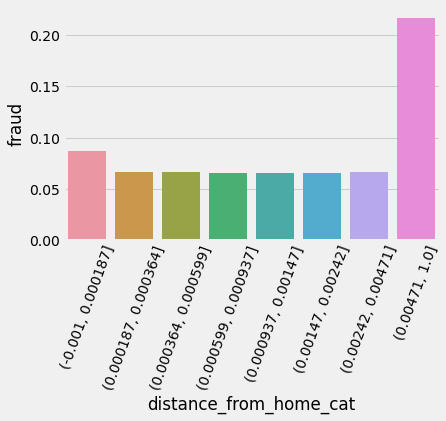

In [11]:
eda_df['distance_from_home_cat'] = pd.qcut(eda_df.distance_from_home,8)
bar = eda_df.groupby(by='distance_from_home_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

The above bar graph shows that the probability of fraud remains constant as the distance increases but at a certain distance, the probability spikes from 5% to 35%. 

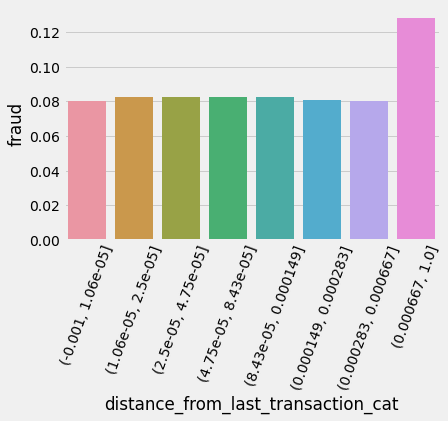

In [12]:
eda_df['distance_from_last_transaction_cat'] = pd.qcut(eda_df.distance_from_last_transaction,8)
bar = eda_df.groupby(by='distance_from_last_transaction_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

The probability of fraud increases as the distance from last transaction increases as shown in the above graph.

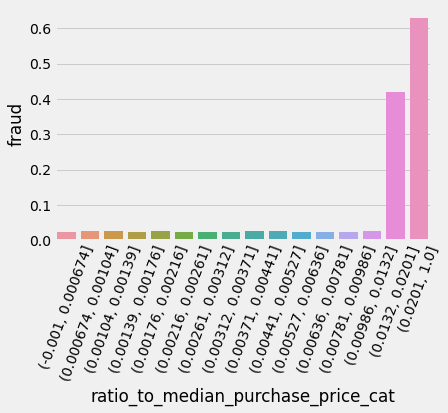

In [13]:
eda_df['ratio_to_median_purchase_price_cat'] = pd.qcut(eda_df.ratio_to_median_purchase_price,16)
bar = eda_df.groupby(by='ratio_to_median_purchase_price_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

The above bar graph shows that the probability of fraud remains constant as the distance increases but at a certain distance, the probability spikes from less than 3% all the way to 40% and then to more than 60%.

### Relationship with categorical Variables

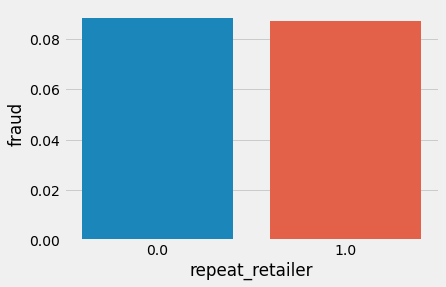

In [14]:
bar = eda_df.groupby(by='repeat_retailer').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

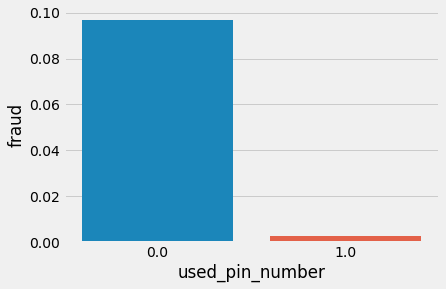

In [15]:
bar = eda_df.groupby(by='used_pin_number').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

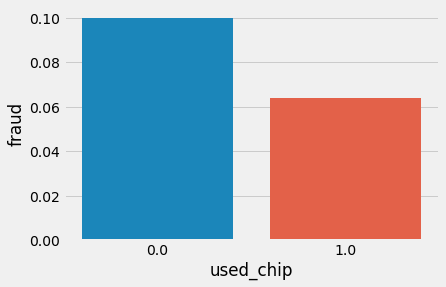

In [16]:
bar = eda_df.groupby(by='used_chip').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

The above graphs show that repeat retailer do not affect the probability of a transaction being fraud.
Used Pin Number transactions are less likely to be a fraud. And used chip transactions are more likely to be a fraud.

### Conclusions from Exploratory Data Analysis

1. The probability of fraud remains constant as the distance from home increases but at a certain distance, the probability spikes to its maximum value.

2. The probability of fraud increases as the distance from last transaction increases.

3. Higher ratio to median purchase price increases the probability of fraud.

4. Used Pin Number transactions are less likely to be a fraud. 

5. Used chip transactions are more likely to be a fraud.

# Building Machine Learning Models

In [17]:
input_cols = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
target_col = 'fraud'

In [18]:
train_x, test_x, train_y, test_y = train_test_split(credit_card_df[input_cols], credit_card_df[target_col], test_size = 0.3)

### 1. Building LogisticRegression Model

In [19]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
print(classification_report(train_y,lr.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,lr.predict(test_x)))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    638826
         1.0       0.89      0.60      0.72     61174

    accuracy                           0.96    700000
   macro avg       0.93      0.80      0.85    700000
weighted avg       0.96      0.96      0.96    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273771
         1.0       0.89      0.60      0.72     26229

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



### 2. Building KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
print(classification_report(train_y,knn.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,knn.predict(test_x)))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    638826
         1.0       0.93      0.96      0.95     61174

    accuracy                           0.99    700000
   macro avg       0.97      0.98      0.97    700000
weighted avg       0.99      0.99      0.99    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273771
         1.0       0.89      0.92      0.91     26229

    accuracy                           0.98    300000
   macro avg       0.94      0.96      0.95    300000
weighted avg       0.98      0.98      0.98    300000



This is by far the easiest Data that I have worked with and the results are so good. Let me try Decision tree classifier to check whether I can reach the test accuracy of 1.0

### 3. Building a Decision Tree Classifier

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_x,train_y)
print(classification_report(train_y,dt.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,dt.predict(test_x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638826
         1.0       1.00      1.00      1.00     61174

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273771
         1.0       1.00      1.00      1.00     26229

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



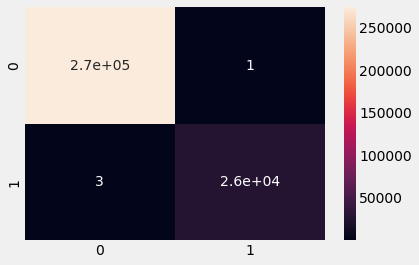

In [22]:
sns.heatmap(confusion_matrix(test_y,dt.predict(test_x)), annot=True);

This is a perfect Model.

### ROC AUC Curves

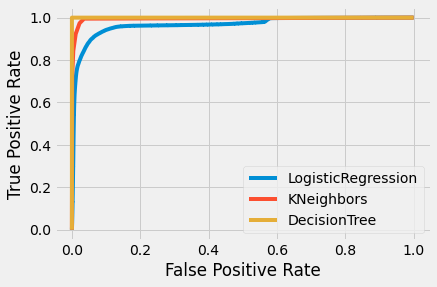

In [23]:
lr_x,lr_y,_ = roc_curve(test_y,lr.predict_proba(test_x)[:,1])
knn_x,knn_y,_ = roc_curve(test_y,knn.predict_proba(test_x)[:,1])
dt_x,dt_y,_ = roc_curve(test_y,dt.predict_proba(test_x)[:,1])

plt.plot(lr_x,lr_y,label='LogisticRegression')
plt.plot(knn_x,knn_y,label='KNeighbors')
plt.plot(dt_x,dt_y,label='DecisionTree')
plt.legend();
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

A perfect ROC AUC curve! for Decision Tree Classifier.

# Future Works

1. I'll try to improve the performance of simple models instead of going for decision tree.

2. I'll try to decrease the complexity of the model by reducing the dimensions of the data by using feature selection techniques and dimensionality reduction techniques.